In [12]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib inline

In [13]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

### Definição de funções úteis.

In [14]:
def calculateErrorSurface(y, x1, x2):
    '''Generate data points for plotting the error surface.'''

    # Generate values for parameter space.
    M = 200
    a1 = np.linspace(-20.0, 24.0, M)
    a2 = np.linspace(-20.0, 24.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
            J[iter1][iter2] = (1.0/len(y))*np.sum(np.square(y - yhat))           
            
    return J, A1, A2

def gradientDescent(X, y_noisy, maxEpochs, N):
    '''Function implementing the batch version of the gradient descent'''
    
    # Create empty structures.
    a_hist = np.zeros((2, maxEpochs))
    Jgd = np.zeros(maxEpochs)
    a_aux = np.zeros((2,1))

    # Intialize the weights.
    a = np.array([-20.0, -20.0]).reshape(2, 1)

    # Intialize weights history.
    a_hist[:, 0] = a.reshape(2,)

    # Calculate the error for the initial weights.
    yhat = X.dot(a)
    Jgd[0] = (1.0/N)*np.sum(np.power(y_noisy - yhat, 2))

    error = 1
    iteration = 0
    while(error > 0.001 and iteration < maxEpochs-1):

        # Hypothesis function.
        h = X.dot(a)

        # Calculate gradient vector.
        gradients = -(2.0/N)*X.T.dot(y_noisy - h)

        # Weight update rule.
        a = a - alpha*gradients

        # Store weight variation.
        a_hist[:, iteration+1] = a.reshape(2,)

        # Calculate and store actual error.
        yhat = X.dot(a)
        Jgd[iteration+1] = (1.0/N)*sum(np.power(y_noisy - yhat, 2))    

        # Error difference between actual and previous iteration.
        error = np.abs(Jgd[iteration]-Jgd[iteration+1])   

        iteration = iteration + 1
        
    return a, Jgd, a_hist, iteration

### Gerando a função observável.

In [15]:
# Number of pairs feature/label.
N = 10000

# Input values (features)
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# True model.
y = x1 + x2

# Observable function.
y_noisy = y + np.random.randn(N, 1)

### Plotando a função observável.

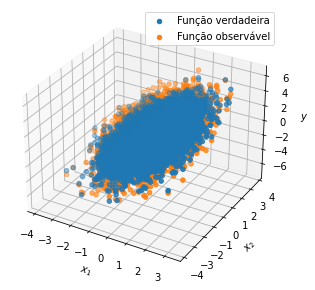

In [16]:
# Plot observable function.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')

ax.scatter(x1,x2,y, label='Função verdadeira')
ax.scatter(x1,x2,y_noisy, label='Função observável')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.legend()
plt.show()

### Encontrando a solução ótima com a equação normal.

In [17]:
# Concatenate both column vectors, x1 and x2.
X = np.block([x1,x2])

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

# Print a1 and a2 weights.
print('peso a1:', a_opt[0][0])
print('peso a2:', a_opt[1][0])

# Perform prediction.
yhat = X.dot(a_opt)

# Calculate the mean squared error.
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

# Plot the MSE.
print('Erro:', Joptimum)

peso a1: 1.0032994113858922
peso a2: 0.9999704951023071
Erro: 0.995225680139118


### Plotando a superfície de erro.

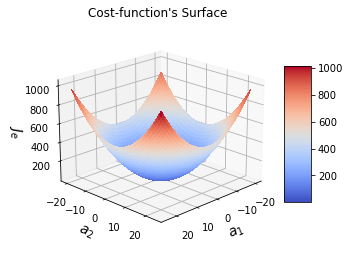

In [18]:
J, A1, A2 = calculateErrorSurface(y_noisy, x1, x2)

# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
#Show the plot.
plt.savefig("superficie_de_erro_ajuste_passo_de_aprendizagem.png", dpi=600)
plt.show()

### Encontrando os pesos com o gradiente descendente.

In [19]:
maxEpochs = 10000

alpha = 0.5

#alpha = 0.01 # Too small learning rate.
#alpha = 0.9 # Too large learning rate.
#alpha = 0.5 # Empirically found optimum learning rate.

# Gradient-descent solution.
a, Jgd, a_hist, iteration = gradientDescent(X, y_noisy, maxEpochs, N)

### Plotando a superfície de contorno

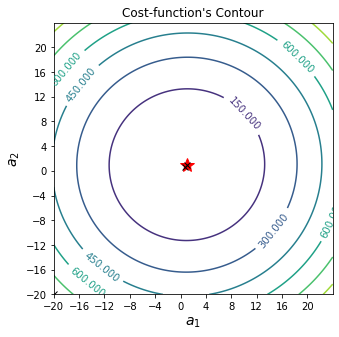

In [20]:
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-20, 24, step=4.0))
plt.yticks(np.arange(-20, 24, step=4.0))
plt.savefig("superficie_de_contorno_ajuste_passo_de_aprendizagem.png", dpi=600)
plt.show()

### Plotando MSE em função das iterações.

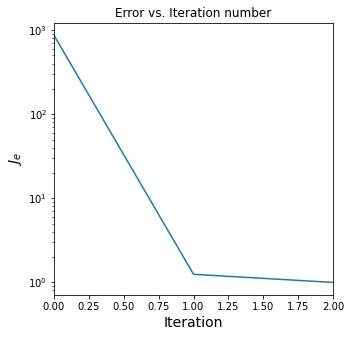

In [21]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number')
plt.xlim(0, iteration-1)
plt.savefig("erro_vs_epoca_ajuste_passo_de_aprendizagem.png", dpi=600)
plt.show()